# Data visualisationa

In [2]:
% matplotlib inline
from collections import Counter
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from mne import filter

In [11]:
SAMPLE_FREQ = 250.

def prepare_data(file_name, float_mean=5):
    ft_mean_samples = int(float_mean * SAMPLE_FREQ)
    data = np.fromfile(file_name, dtype='float32')
    data = data.reshape(-1, 17)
    eeg = data[:, :8]
    means = np.array([np.mean(eeg[i:ft_mean_samples+i], axis=0) for i in range(len(eeg) - ft_mean_samples)])
    print (means.shape)
    eeg = eeg[ft_mean_samples:] - means
    for i in range(eeg.shape[1]):
        eeg[:, i] = filter.notch_filter(x=eeg[:, i].astype(np.float64), Fs=SAMPLE_FREQ, freqs=[50], trans_bandwidth=2)
        b, a = signal.butter(5, np.array([0.5, 30]) / (0.5 * SAMPLE_FREQ), btype='band')
        eeg[:, i] = signal.lfilter(b, a, eeg[:, i])
    return eeg

def show_data(eeg):
    plt.figure(figsize=(12, 5)), plt.grid()
    for i in range(eeg.shape[1]):
        plt.plot(eeg[:, i], label=str(i + 1))
    plt.legend(), plt.ylim([-150, 150])

(11008, 8)
Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


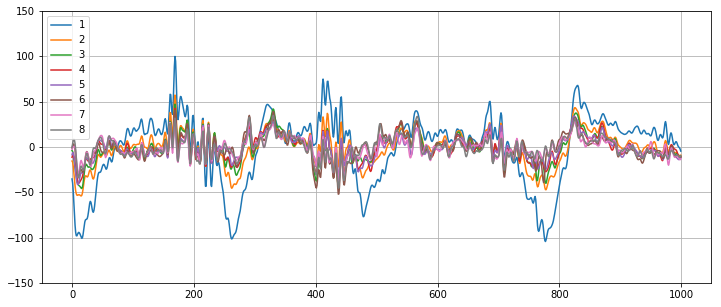

In [12]:
eeg_both = prepare_data('./local_data/blinking/both.bin')
show_data(eeg_both[2000:3000])

(5065, 8)
Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


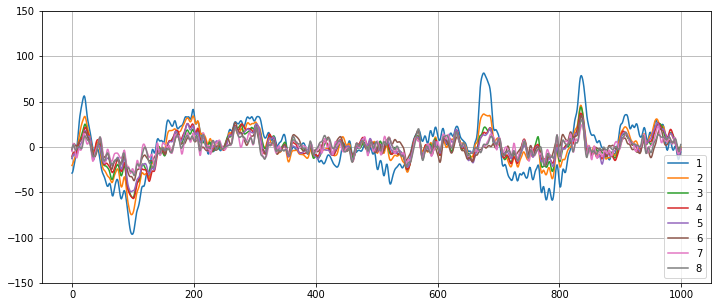

In [13]:
eeg_left = prepare_data('./local_data/blinking/left.bin')
show_data(eeg_left[2000:3000])

(6087, 8)
Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


Setting up band-stop filter from 49 - 51 Hz


Filter length of 825 samples (3.300 sec) selected


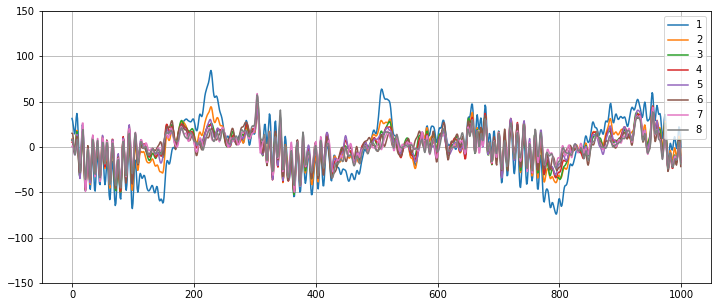

In [14]:
eeg_right = prepare_data('./local_data/blinking/right.bin')
show_data(eeg_right[2000:3000])